<a href="https://colab.research.google.com/github/BankNatchapol/ML-Algorithm/blob/master/Regularized_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regularized Linear Regression**
---

ในการทำทำ Linear Regression ในบางกรณีที่เรามี feature ที่ใช้ในการ train มากเกินไปจะทำให้เกินปัฯหาที่เรียกว่า Overfitting ขึ้น<br> 
Overfitting คือ ปัญหาที่เวลามี feature ในการ train มากเกินไปจะทำให้ function ที่เราประมาณได้มีความ fit กับ training set มากเกินไปทำให้เวลาที่นำไปใช้กับข้อมูลอื่นๆจะ fail ในการทำนาย<br>
ซึ่งก็จะมีหลายวิธีในการจัดการกับ Overfitting หนึ่งในนั้นก็คือ Regularization 
![alt text](http://scikit-learn.org/stable/_images/sphx_glr_plot_underfitting_overfitting_001.png) 
<br>
<center>


<b>idea: </b> สมมุติสมการในevent ต่างๆเป็นดังนี้
<p><b>Underfit  : </b>&#8195$\theta_0+\theta_1x$&#8195 <p>
<p><b>Good fit  : </b>$\theta_0+\theta_1x+\theta_2x^2$</p>
<p><b>Overfit  : </b>$\theta_0+\theta_1x+\theta_2x^2+\theta_3x^3+\theta_4x^4$</p>
</center>
<br>
จะสังเกตได้ว่า ในกรณีของ underfit นั้นวิธีการแก้ไขก็คือทำให้ $\theta_2$ มีค่าเพิ่มขึ้นจนมีพจน์เท่ากับ Good fit <br>
ในกรณีของ overfit จะเห็นได้ว่ามีพจน์ $\theta_3$ และ $\theta_4 $เกินมา ดังนั้นถ้าเราลด $\theta_3$ และ $\theta_4 $ ให้เข้าใกล้ 0 จะกลายเป็น Good fit ได้
<br><br>
ซึ่งในการปรับ parameter นั้นเราสามารถทำได้จากการปรับ cost function เป็นในรูปแบบนี้ <br><br>
\begin{equation}
Cost\;Function\;:\;\;
J(\theta) = \frac{1}{2m}(\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})^2+\lambda\sum^m_{j=1}\theta^2_j)
\end{equation}<br>
ซึ่งจะเห็นว่ามีการเพิ่มพจน์ที่เป็น Regularization term เข้ามา เพิ่มเวลาที่เราใช้ Algorithm ในการหาค่า min ของ cost function จะทำให้เวลาคิด พจน์ $\theta$ ที่มีค่ามากๆ จะถูกลดค่าลงเยอะ

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston

ทำการสร้าง function hypothesis, cost function และ ใช้ Gradient Descent ในการ หาค่า minimum โดย Gradient ของ cost function จะเป็น<br><br>
\begin{equation}
\theta_0 := \theta_0-\alpha\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_0
\end{equation}
<br>
\begin{equation}
\theta_j := \theta_j-\alpha(\frac{1}{m}\sum^m_{i=1}(h_\theta(x^{(i)}) - y^{(i)})x^{(i)}_j +\frac{\lambda}{m}\theta_j)
\end{equation}<br><br>
โดยที่ในพจน์ 0 ไม่มี regularized term เพราะมันไม่มี feature ในส่วนนั้น เราจึงไม่จำเป็นต้อง regularize มัน 

In [0]:
def linHypo(theta,x):
  return np.dot(theta.T,x.T).T

def rcost(theta,x,y):
  cost = linHypo(theta,x) - y
  return cost
  
def linCostReg(theta,x,y,lamb=1):
  m = len(y)
  o = np.ones([1,len(y)])
  cost = np.dot(o,rcost(theta,x,y)**2)
  o1 = np.ones([1,len(x[0,:])])
  o1[:,0] = 0
  reg = lamb*(np.dot(o1,theta**2))
  J = (1/(2*m))*(cost+reg)
  return J

def linGrad(theta,x,y,lamb=1,alpha = 0.01):
  m = len(y) 
  frac = 1-(alpha*lamb/m)
  mfrac = frac * np.ones([len(x[0,:]),1])
  mfrac[0,:] = 1 
  theta = theta*mfrac - (alpha/m)*np.dot(x.T,rcost(theta,x,y))
  return theta

ทำการ load boston dataset เพื่อใช้ในการทำ Linear Regression

In [0]:
[x,y] = load_boston(return_X_y=True) # boston housing datasets
y = y.reshape(len(y),1)
df = pd.DataFrame(x) # create dataframe
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [0]:
target = pd.DataFrame(y,columns=['PRICES']) # target prices
target.head()

,PRICES
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


ทำ feature scaling ด้วย Z-score standardization

In [0]:
def scaling(x): #scaling input 
  std = np.std(x)
  mean = np.mean(x)
  return (x-mean)/std
df1 = scaling(df)
df1.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.419782,0.284830,-1.287909,-0.272599,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562
1,-0.417339,-0.487722,-0.593381,-0.272599,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439
2,-0.417342,-0.487722,-0.593381,-0.272599,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727
3,-0.416750,-0.487722,-1.306878,-0.272599,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517
4,-0.412482,-0.487722,-1.306878,-0.272599,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501


In [0]:
x1 = np.ones([x.shape[0],x.shape[1]+1]) # add ones column
x1[:,1:] = df1

กำหนด $initial \;\theta, \alpha\;และ\;\lambda$

In [0]:
theta = np.zeros([x.shape[1]+1,1])
alpha = 0.01
lamb = 1

run Gradient Descent เพื่อหาค่า $\theta$

In [0]:
p = []
J = linCostReg(theta,x1,y,lamb)+1
while J-linCostReg(theta,x1,y,lamb)>0.00000000000001:
  J = linCostReg(theta,x1,y,lamb)
  p.append(J[0])
  theta = linGrad(theta,x1,y,lamb,alpha)
theta 

array([[ 2.25328063e+01],
       [-9.19870420e-01],
       [ 1.06645946e+00],
       [ 1.17379973e-01],
       [ 6.85127626e-01],
       [-2.02900928e+00],
       [ 2.68275465e+00],
       [ 1.31577285e-02],
       [-3.07734004e+00],
       [ 2.59152529e+00],
       [-2.01054385e+00],
       [-2.05238410e+00],
       [ 8.48848301e-01],
       [-3.73066599e+00]])

ลอง plot cost function เพื่อดูว่าผลลัพท์เป็นไปตามทฤษฏีไหม

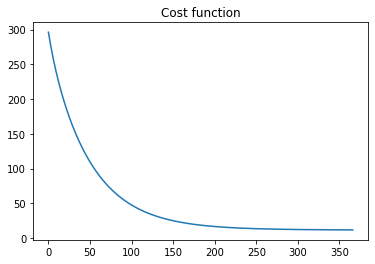

In [0]:
plt.plot(range(int(len(p)/50)),p[:int(len(p)/50)]);
plt.title('Cost function');

ลองดูการใช้ $\lambda$ ค่าต่างๆ

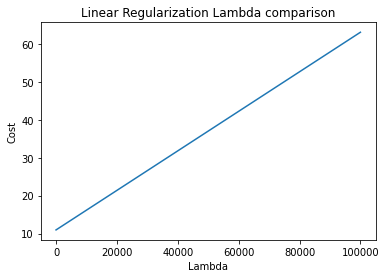

In [0]:
q = []
for i in np.arange(0,1000,0.01):
  q.append(linCostReg(theta,x1,y,i)[0])
plt.plot(range(100000),q)
plt.title('Linear Regularization Lambda comparison')
plt.xlabel('Lambda')
plt.ylabel('Cost');

จะพบว่าในกรณีนี้การทำ Regularization ทำให้ผลลัพท์แย่ลง เนื่องจากจำนวน feature มีน้อยอยู่แล้วจึงไม่เกิดปัญหา Overfitting การทำ Regularization อาจจะยิ่งทำให้เกิดปัญหา underfitting แทน